# Face Recognition

## What is Face Recognition?
- Face Verification vs. Face Recognition
    - Verification
        - Input image, name, or ID
        - Output whether the input image is that of the claimed person
    - Recognition
        - Given a dataset of $K$ people
        - Input an image
        - Output whether the image is any of the $K$ people or "not recognized"

## One-Shot Learning
- The one-shot problem refers to the challenge of learning from one example (e.g. a single employ headshot in the database), while deep learning techniques usually don't work well with such small training sets.
- One way to solve this problem is to **learn a similarity function**.
    - Instead of training a ConvNet classifier, we train the model to learn a similarity function that outputs the degree of difference between images $d(img1, img2)$.
    
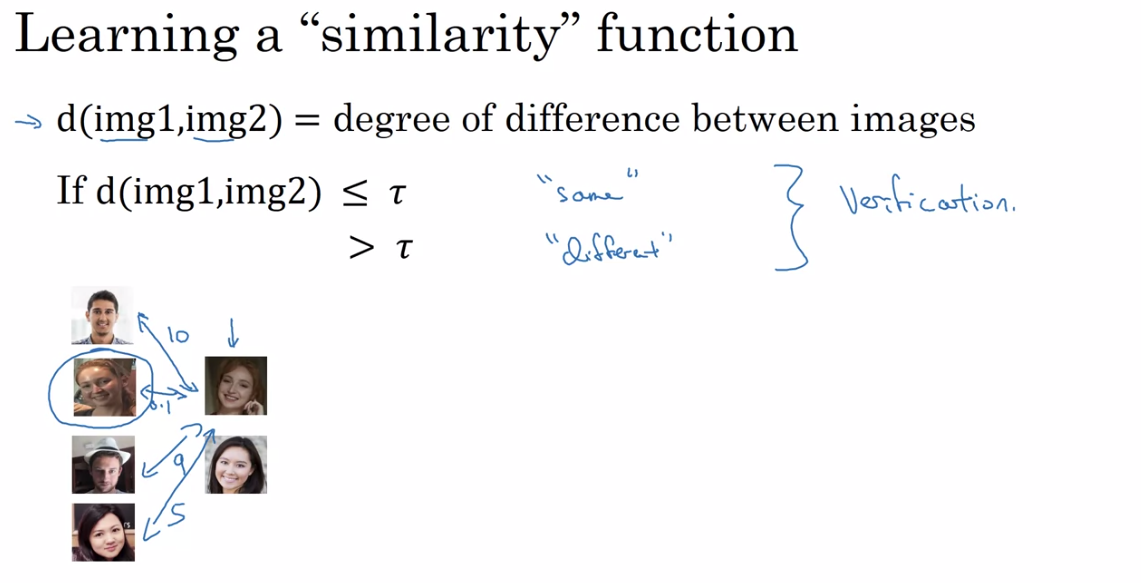

## Siamese Network
- A **Siamese Network** learns a "similarity" function as mentioned above.
- The NN takes in an image $x^{(i)}$, and its parameters define an encoding of the image $f(x^{(i)})$, which is the output pf the NN.

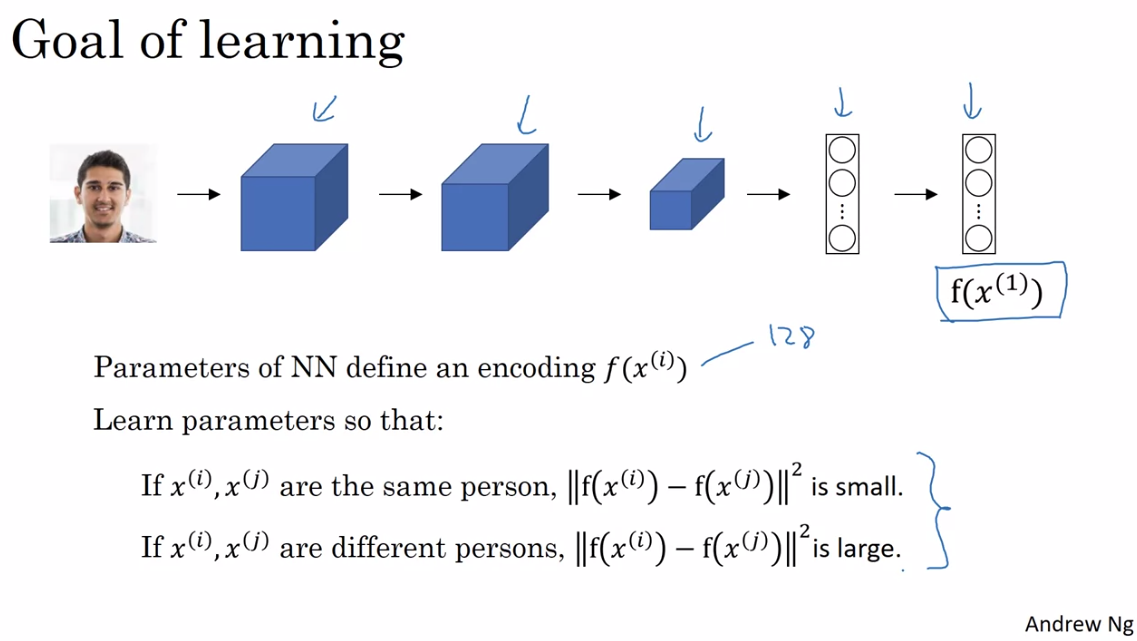

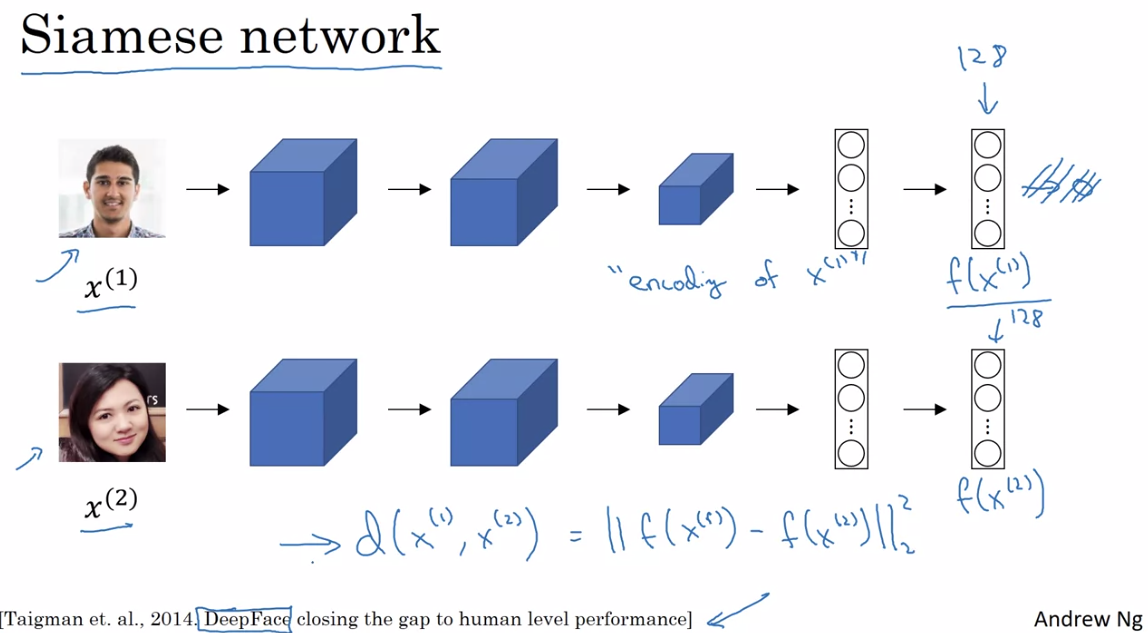

## Triplet Loss
- To train the Siamese network that outputs the differene between two images, we train the NN with pairs of images.
    - The **Anchor-Positive** pair consists of the anchor image A and a positive example P (i.e. image of the same person as the anchor).
    - The **Anchor-Negative** pair consists of the anchor image A and a negative example N (i.e. image of a different person from the anchor).
- Learning Objective
    - We want to have $d(A, p) \leq d(A, N)$, which is equivaltent to $d(A, P) - d(A, N) \leq 0$.
    - To avoid the case that the NN just assign the same encoding to all images so that $d(A, P) = d(A, N) = 0$ for all time, we add a **margin** term $\alpha$ in the equation: $d(A, P) - d(A, N) + \alpha \leq 0$.
- Loss Function
    - With the learning objective in mind, we define the loss function and cost function as following:
        - $L(A, P, N) = max(\| f(A) - F(P) \|^{2} - \| f(A) - F(N) \|^{2} + \alpha, 0)$
        - $J = \sum_{i=1}^{m} L(A^{(i)}, P^{(i)}, N^{(i)})$
        
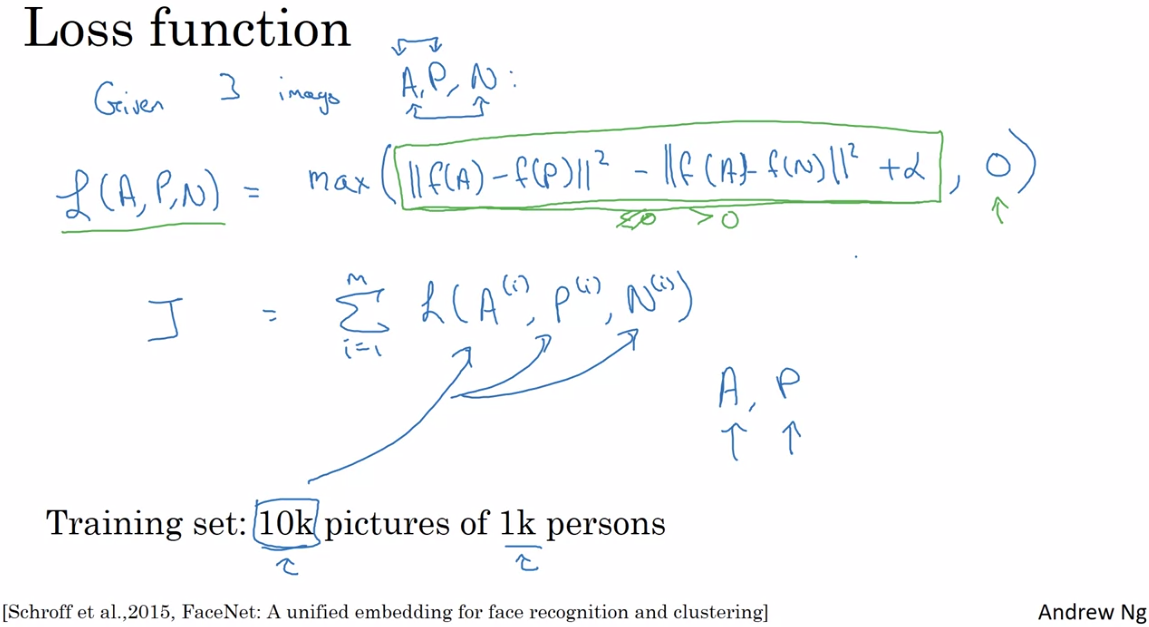

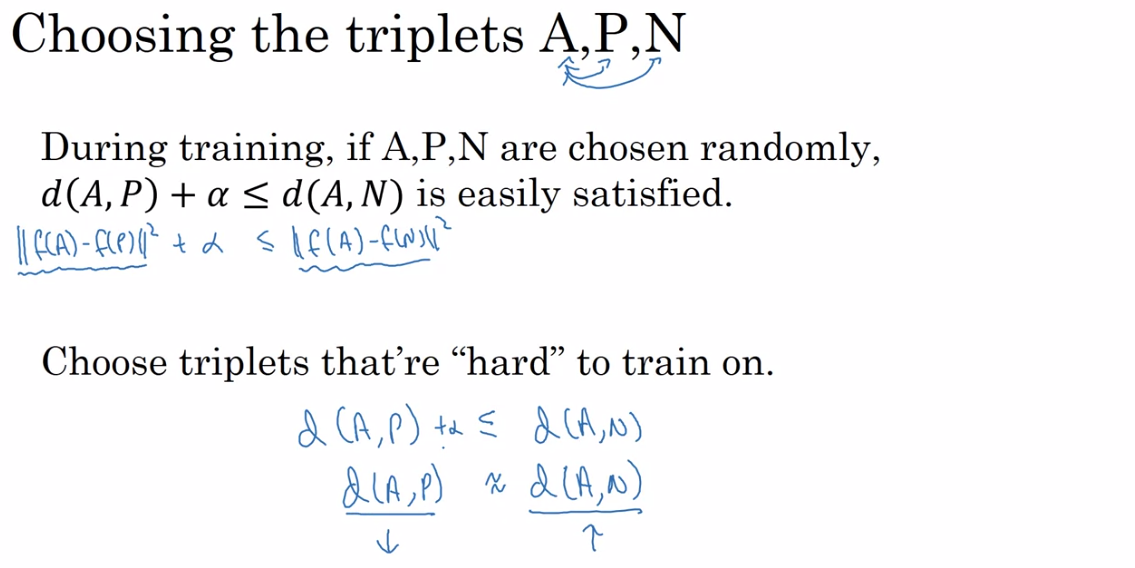

## Face Verification and Binary Classification
- An alternative to the triplet loss function is to treat face verification as a binary classification problem.
- In this case, we use a training set of pairs of two images with corresponding lables of 0 or 1.
- A computational trick is to precompute and save the encodings for all database images.
    - In this way, for the testing step, we only need to run the new image through the ConvNet. 
    - We then feed the precomputed encodng for database image, together with the new enconding output from the CNN, into the sigmoid function to generate 0 or 1.

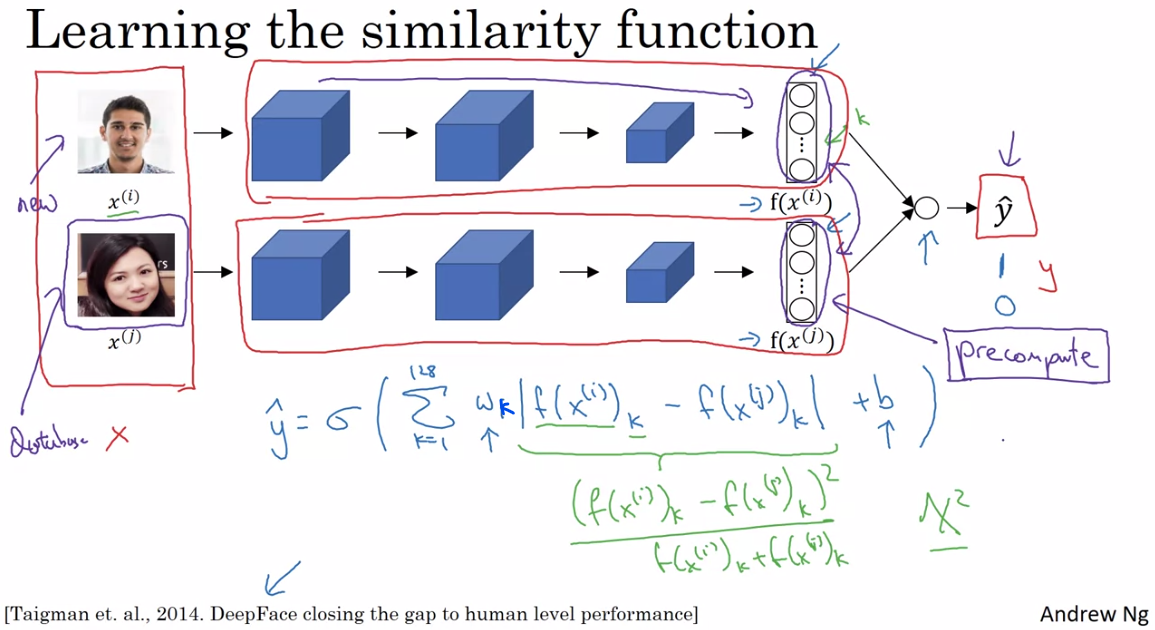

# Neural Style Transfer

## What is Neural Style Transfer?

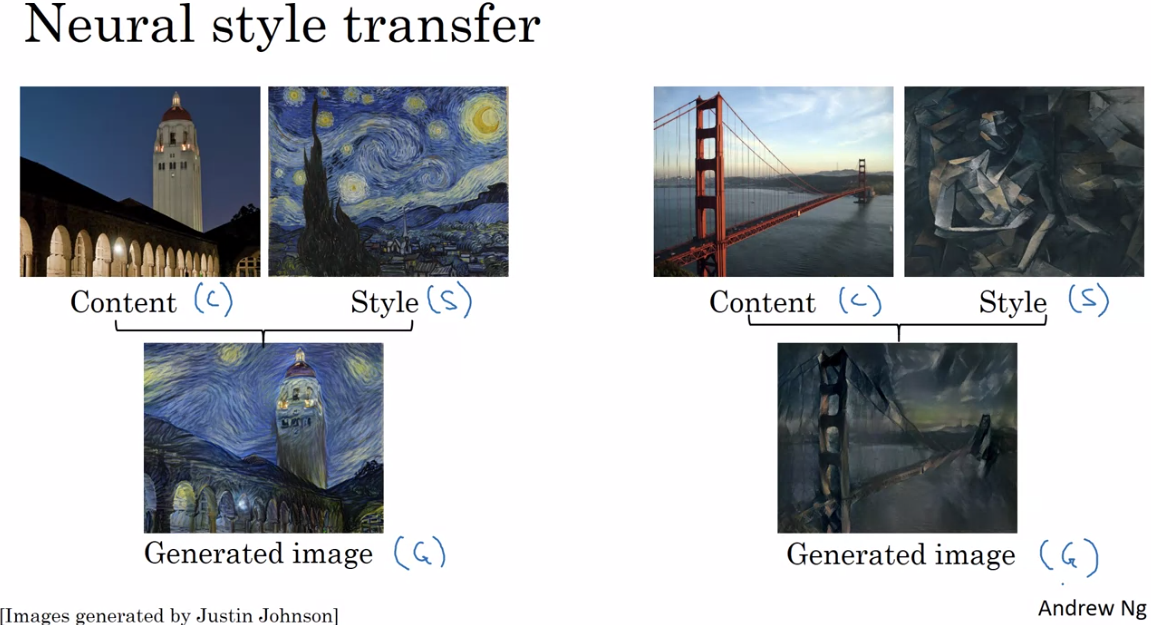

## What are Deep ConvNets Learning?
- In deeper layers, a hidden unit will see a larger region of the image, thus detecting more complex features than the shallower layers.

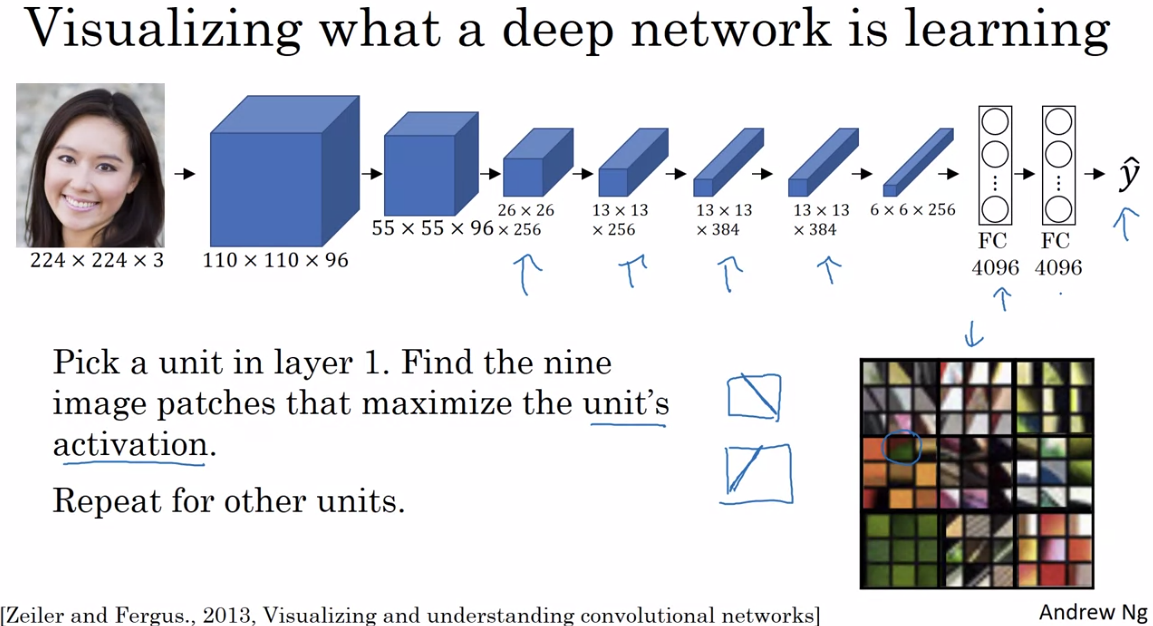

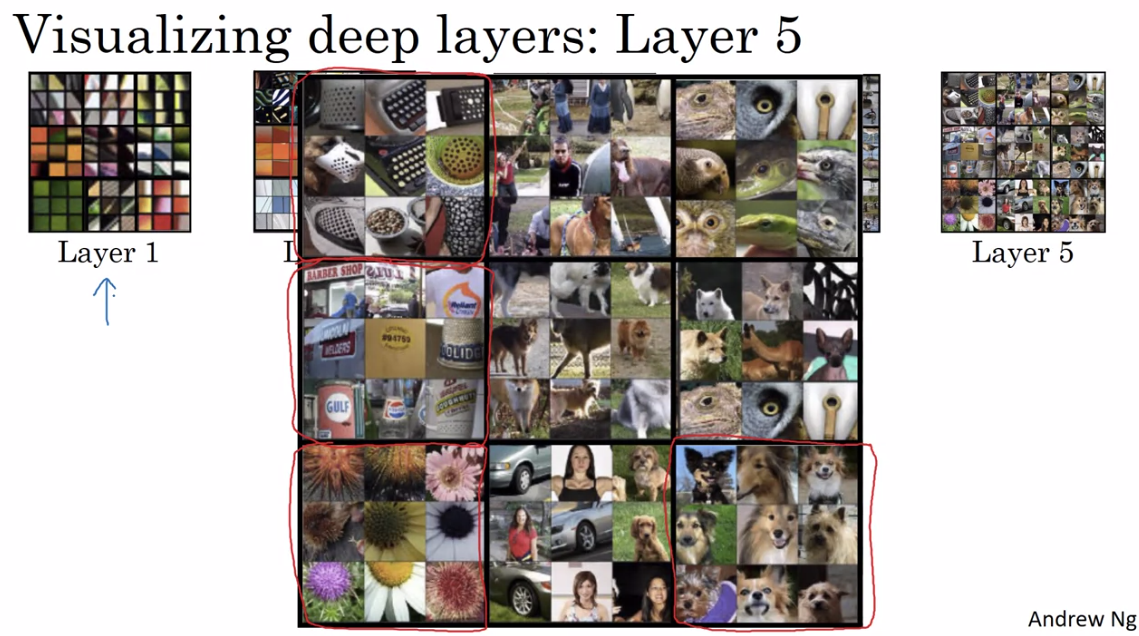

## Cost Function
- For neural style tranfer, we define the cost function as the weighted sum of two components:
    - $J(G) = \alpha J_{content}(C, G) + \beta J_{style}(S, G)$

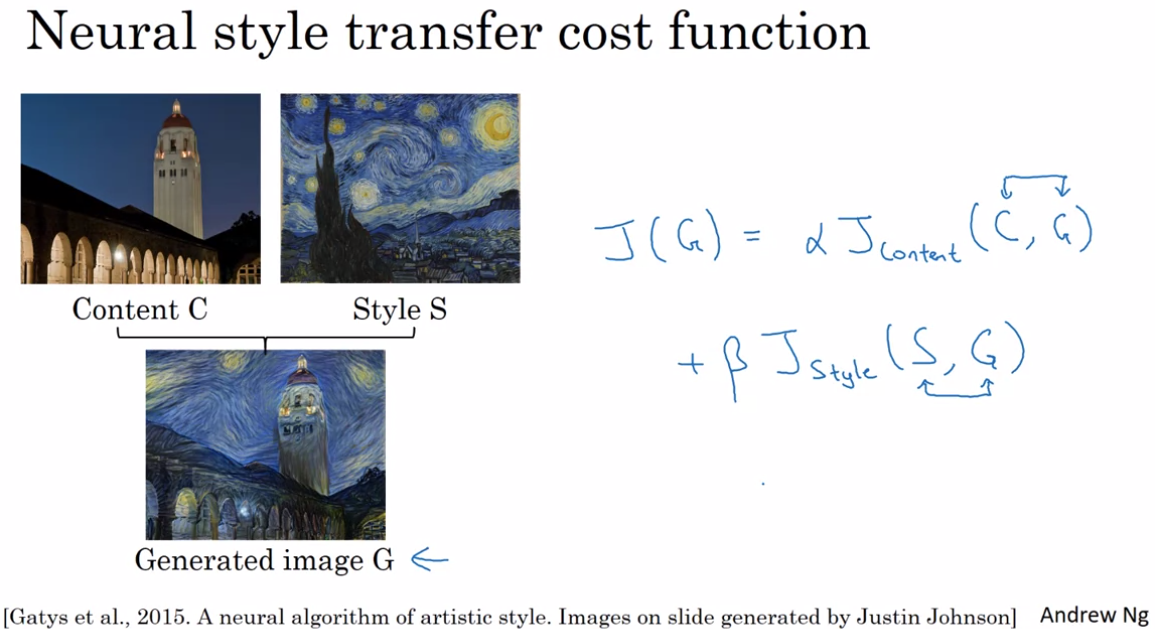

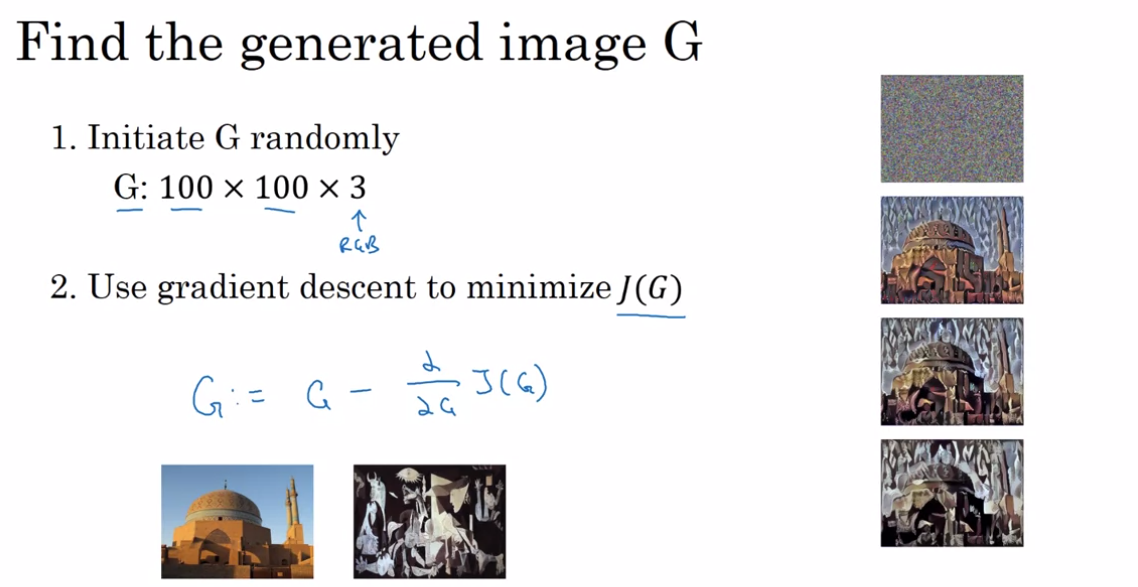

## Content Cost Function
- Assume that we use hidden layer $l$ to compute the content cost.
- We feed the content image $C$ and randomly-initialized generated image $G$ into a pre-trained ConvNet, get the activations on layer $l$, and calculate the content cost as:
    - $J_{content}(C, G) = \frac{1}{2} \| a^{[l](C)} - a^{[l](G)} \|^{2}$

## Style Cost Function
- Assume that we use hidden layer $l$'s activation to measure "style".
- We then define style as the **"correlation"** between activations **across channels**.
- More Formally - **Style Matrix**
    - Let $a^{[l]}_{i,j,k}$ be the activation at $(H, W, C) = (i, j, k)$ of an image.
    - Let style matrix $G^{[l]}$ be a $n_{c}^{[l]} \times n_{c}^{[l]}$ matrix.
    - For channel $k$ and $k'$, define
        - $G^{[l]}_{kk'} = \sum_{i=1}^{n_{H}^{[l]}} \sum_{i=1}^{n_{W}^{[l]}} a^{[l]}_{ijk} a^{[l]}_{ijk'}$
- We compute style matrices for all channels for **style image (S)** and **generated image (G)** respectively and define the style cost function for layer $l$ as below:

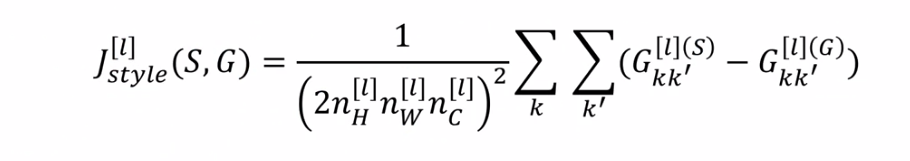

- We can also define an **overall style cost function** that takes a weighted average of cost functions across different layers.
- Finally, we can optimize the entire neural style transfer function by putting the style and content cost functions back together.

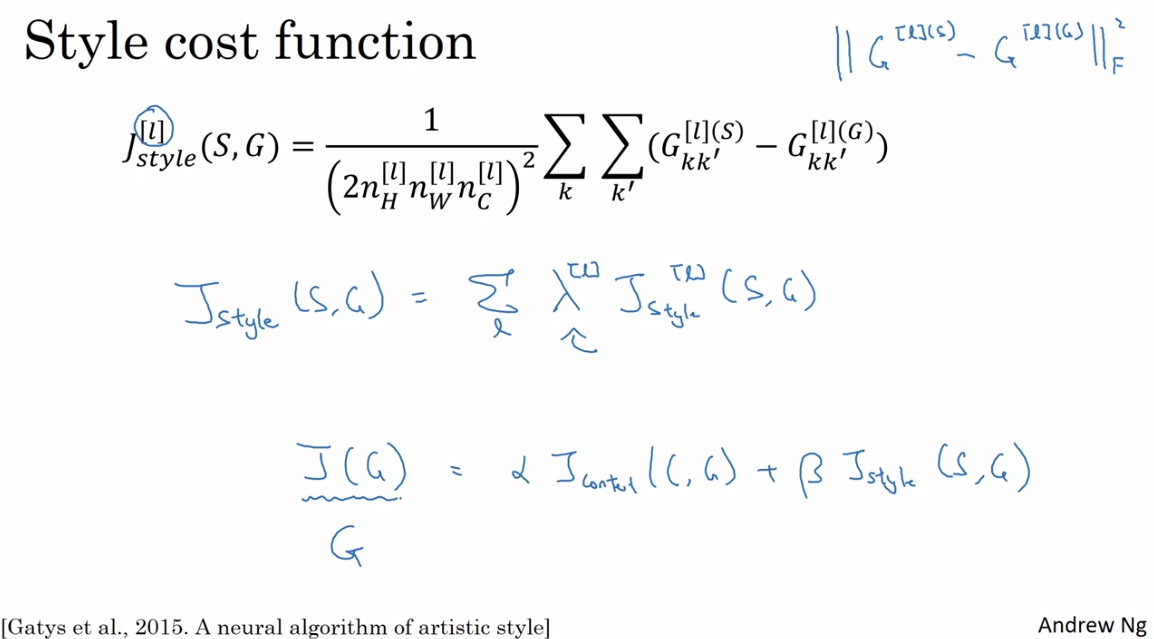

## 1D and 3D Generalizations

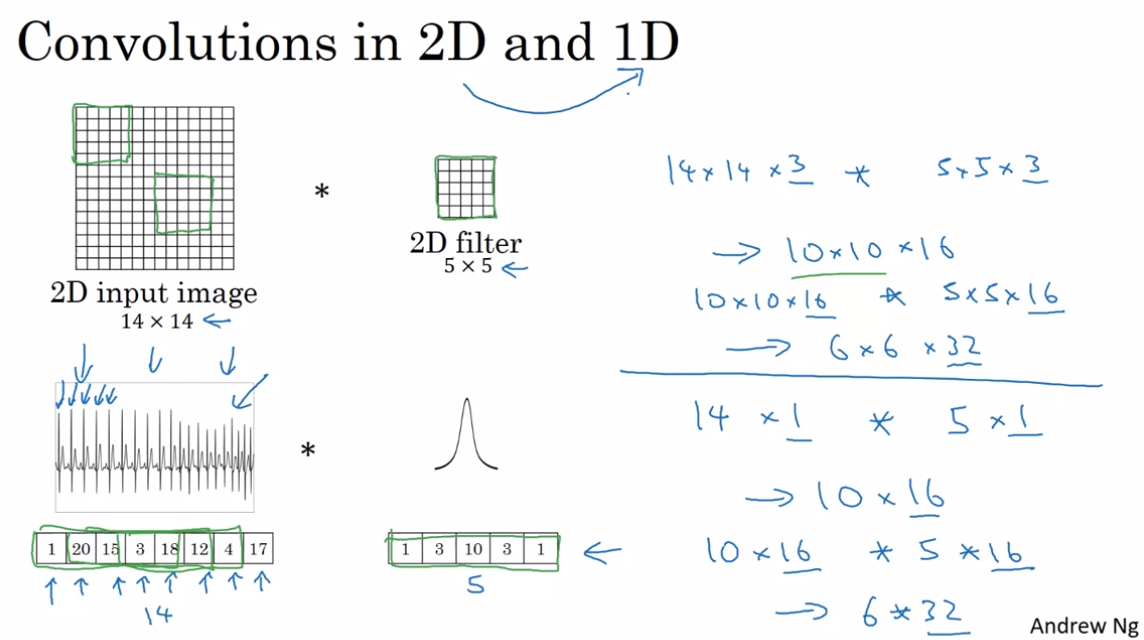

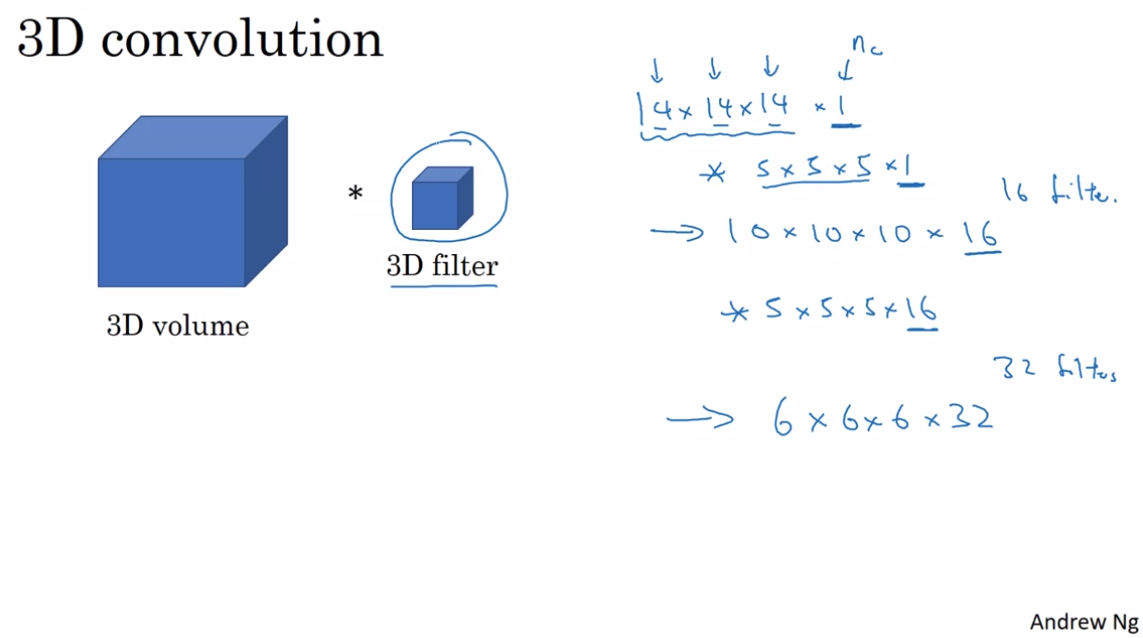